Przykładowe kody do pomiaru wydajności modeli statystycznych, klasyfikacji oraz regresji. 
Dane Titanic pobran z https://www.kaggle.com/competitions/titanic/data

In [1]:
# ładuję potrzebne biblioteki
import pandas as pd 
import numpy as np
import os 

path = "E:\page_ds\performance_measure"

data = pd.read_csv(os.path.join(path, "train.csv"))
# niestety nie doczytałem, że zbiór testowy nie zawiera etykiet!
data_test = pd.read_csv(os.path.join(path, "test.csv"))
display(data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from dataprep.eda import create_report

report = create_report(data, title='EDA dla zbioru Titanic')
# przenoszę do przeglądarki
report.save( "EDA_dla_Titanic.html")
report.show_browser()
report.show()

Dla ułatwienia tematu, pozostawię sobie jedynie kilka kolumn niezbędnych do zbudowania dowolnego modelu. Dodatkowo przekoduję zmienne na numeryczne aby modele działały bez zarzutu

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
# dla kilku zmiennych posiadamy braki w danych, przekodowuję rónież cechy o typie innym niż numeryczny
from sklearn.impute import SimpleImputer

data['Sex_decode'] = np.where(data['Sex']=='male', 1,0)
data_test['Sex_decode'] = np.where(data_test['Sex']=='male', 1,0)

# uzupełniam wartości nullowe na zmiennej Embarked
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp = imp.fit(data[['Embarked']])
data['Embarked'] = imp.transform(data[['Embarked']])
data_test['Embarked'] = imp.transform(data_test[['Embarked']])

# teraz dekoduję na wartości 1,2,3

#conditions = [
#    (data['Embarked'] == 'S'),
#    (data['Embarked'] == 'C') ,
#    (data['Embarked'] == 'Q') 
#]
#
#values = [1, 2, 3]
#
#data['Embarked_cd'] = np.select(conditions, values)
#data_test['Embarked_cd'] = np.select(conditions, values)

# przekodowanie zmiennej Embarked
data_dict = {'S':1, 'C':2,'Q':3}

data['Embarked_cd']  = data['Embarked'].map(data_dict) 
data_test['Embarked_cd']  = data_test['Embarked'].map(data_dict) 



In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_decode,Embarked_cd
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,2


In [15]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_decode',
       'Embarked_cd'],
      dtype='object')

In [3]:
# finalne dane oraz podział na zbiór uczący oraz walidacyjny
from sklearn.model_selection import train_test_split
y = pd.Series(data['Survived'])  
X = data[['Pclass','Sex_decode','SibSp','Parch','Fare','Embarked_cd']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=128262)

In [4]:
data['Embarked'].isnull().sum()

0

In [7]:
#prosty modelik SGD
from sklearn.linear_model import SGDClassifier
# dla tego estymatora należy zawsze zeskalować dane, inaczej może się albo długo uczyć, 
# albo w nieprawidłowy sposób wartościować cechy wysokoliczbowe
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

sgd_clf = make_pipeline(StandardScaler(), 
                        SGDClassifier(max_iter=1000, tol=1e-3, random_state = 128262))

#sgd_clf = SGDClassifier(random_state = 128262)
sgd_clf.fit(X_train, y_train)
klasy = sgd_clf.classes_

#jaka jest dokładność naszego modelu
tmp1 = cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')
#array([0.68715084, 0.75842697, 0.66292135, 0.78651685, 0.78089888])

Zbuduję teraz trywialny estymator bazowy

In [8]:
#prosty model zerowy dziedziczący z estymatora bazowego sklearn
from sklearn.base import BaseEstimator

#przygotowuję zerowy klasyyfikator zawsze wskazujący klasę większościową
class NoSurvivedClasifier(BaseEstimator):
    
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
                        
#sprawdzam jaka będzie dokładność naszego modelu

NoSurv_clf = NoSurvivedClasifier()
tmp2 = cross_val_score(NoSurv_clf, X_train, y_train, cv=5, scoring='accuracy')
#array([0.67039106, 0.55617978, 0.61235955, 0.59550562, 0.64606742])              

In [22]:
print(np.mean(tmp1))
print(np.mean(tmp2))

0.7528612232837585
0.6236284841918645


No to przyglądnijmy się macierzom pomyłek dla naszych modeli. Przygotuję po macierzy zbudowanej modelem w standardowy sposób oraz dla modeli zbudowanych metodą cv

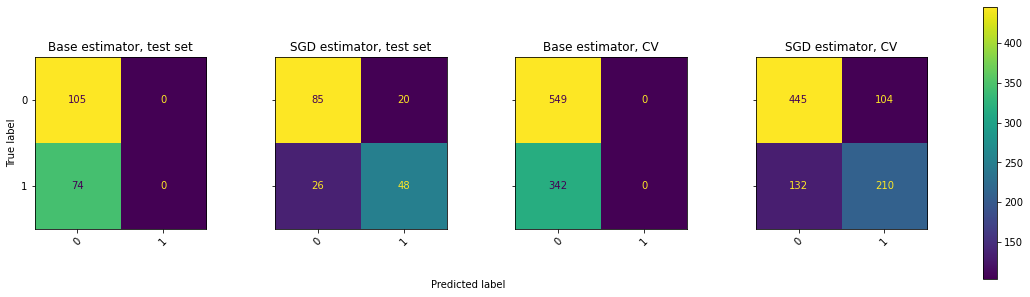

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# kod na pojedynczą macierz
#cm = confusion_matrix(y_test, y_hat, labels=xgb_clf.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                              display_labels=xgb_clf.classes_)

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
# teraz jakbyśmy mieli podobne modele dobrze by było pojechać pętlą jak pokazano tutakj 
# https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side


# bazowy zbiór testowy
y_hat = NoSurv_clf.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels = klasy)
disp.plot(ax=axes[0], xticks_rotation=45)
disp.ax_.set_title("Base estimator, test set")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')

# SGD  zbiór testowy
y_hat = sgd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels = klasy)
disp.plot(ax=axes[1], xticks_rotation=45)
disp.ax_.set_title("SGD estimator, test set")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

# Base estimator CV
y_hat = cross_val_predict(NoSurv_clf, X, y, cv=5)
cm = confusion_matrix(y, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels = klasy)
disp.plot(ax=axes[2], xticks_rotation=45)
disp.ax_.set_title("Base estimator, CV")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')


# SGD estimator CV
y_hat = cross_val_predict(sgd_clf, X, y, cv=5)
cm = confusion_matrix(y, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels = klasy)
disp.plot(ax=axes[3], xticks_rotation=45)
disp.ax_.set_title("SGD estimator, CV")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.savefig("confusion_matrix_examples.png", format='png', dpi=300, facecolor="White")
plt.show()

Brawo, udało się uzyskać model mocniejszy od zerowego. Dokładność zerowego średnio wynosi około 61.61% co jest zbieżne z udziałem zgonów na poziomie 61.62%

#### Dokładność czyli accuracy

In [28]:
# przeliczenie na dowolnym zbiorze po przygotowaniu dwóch różnych modeli
from sklearn.metrics import accuracy_score

y_hat_sgd = sgd_clf.predict(X_test)
y_hat_zero = NoSurv_clf.predict(X_test)

#zbiór testowy
print("Accuracy for SGD model, test set: {0:.4f}".format(accuracy_score(y_test, y_hat_sgd)))
print("Accuracy for Base model, test set: {0:.4f}".format(accuracy_score(y_test, y_hat_zero)))
#zbiór treningowy
print("Accuracy for SGD model, train set: {0:.4f}".format(accuracy_score(y_train, sgd_clf.predict(X_train))))
print("Accuracy for Base model, train set: {0:.4f}".format(accuracy_score(y_train, NoSurv_clf.predict(X_train))))

# można jeszcze porównać sprawdzeniem krzyżowym na pełnym zbiorze danych
sgd_cv = cross_val_score(sgd_clf, X, y, cv=5, scoring='accuracy')
NoSurv_cv = cross_val_score(NoSurv_clf, X, y, cv=5, scoring='accuracy')

print("Accuracy for SGD model, Cross validation: {0:.4f}".format(np.mean(sgd_cv)))
print("Accuracy for Base model, Cross validation: {0:.4f}".format(np.mean(NoSurv_cv)))


Accuracy for SGD model, test set: 0.7430
Accuracy for Base model, test set: 0.5866
Accuracy for SGD model, train set: 0.7626
Accuracy for Base model, train set: 0.6236
Accuracy for SGD model, Cross validation: 0.7352
Accuracy for Base model, Cross validation: 0.6161


#### Precyzja czyli precision 

In [12]:
from sklearn.metrics import precision_score

y_hat_sgd = sgd_clf.predict(X_test)

#zbiór testowy
print("Precision for SGD model, test set: {0:.4f}".format(precision_score(y_test, y_hat_sgd)))
#zbiór treningowy
print("Precision for SGD model, train set: {0:.4f}".format(precision_score(y_train, sgd_clf.predict(X_train))))

# można jeszcze porównać sprawdzeniem krzyżowym na pełnym zbiorze danych
sgd_cv = cross_val_score(sgd_clf, X, y, cv=5, scoring='precision')

print("Precision for SGD model, Cross validation: {0:.4f}".format(np.mean(sgd_cv)))

Precision for SGD model, test set: 0.7059
Precision for SGD model, train set: 0.6840
Precision for SGD model, Cross validation: 0.6725


#### Pełność czyli Recall

In [14]:
from sklearn.metrics import recall_score

y_hat_sgd = sgd_clf.predict(X_test)

#zbiór testowy
print("Recall for SGD model, test set: {0:.4f}".format(recall_score(y_test, y_hat_sgd)))
#zbiór treningowy
print("Recall for SGD model, train set: {0:.4f}".format(recall_score(y_train, sgd_clf.predict(X_train))))

# można jeszcze porównać sprawdzeniem krzyżowym na pełnym zbiorze danych
sgd_cv = cross_val_score(sgd_clf, X, y, cv=5, scoring='recall')

print("Recall for SGD model, Cross validation: {0:.4f}".format(np.mean(sgd_cv)))

Recall for SGD model, test set: 0.6486
Recall for SGD model, train set: 0.6866
Recall for SGD model, Cross validation: 0.6135
